In [ ]:
# --- Before your go ----
# 1. Rename Assignment-02-###.ipynb where ### is your student ID.
# 2. The deadline of Assignment-02 is 23:59pm, 04-18-2023


In [ ]:
# In this assignment, you will use word embeddings to explore our Wikipedia dataset.


In [1]:
# Task 1 --- Train word embeddings using SGNS ---
# Use our enwiki-train.json as training data. 
# You can use the Gensim tool (https://radimrehurek.com/gensim/models/word2vec.html). 
# But it is recommended to implement by yourself.
# You should explain how hyper-parameters such as dimensionality of embeddings, window size, 
# the parameter of negative sampling strategy, and initial learning rate have been chosen.

# Your code
from gensim.models import Word2Vec
import jsonlines
from nltk.tokenize import word_tokenize

arr = []
interpunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%','{','}',"'",'`',"''", '``', '\\']
START_TOKEN = '<START>'
END_TOKEN = '<END>'

with open('enwiki-train.json', 'r+', encoding='UTF-8') as f:
    for item in jsonlines.Reader(f):
        trainTokens = word_tokenize(item['text'])
        trainTokens = [word.lower() for word in trainTokens if word not in interpunctuations]
        arr.append([START_TOKEN] + trainTokens + [END_TOKEN])

# train the model
model = Word2Vec(arr, vector_size=100, sg=1, window=5, min_count=1, workers=4)

# get the word vector for a specific word
vector = model.wv['word']
print(type(vector))
print(vector)

<class 'numpy.ndarray'>
[ 3.33071709e-01 -4.80430841e-04 -3.24091136e-01  5.55896938e-01
  3.29697698e-01 -8.19110453e-01 -9.23008546e-02  9.39269125e-01
 -5.68823278e-01 -6.02159262e-01  1.45295173e-01 -2.15360761e-01
 -3.49723637e-01  4.87351984e-01  4.23764110e-01  5.12549616e-02
 -1.27141640e-01 -5.23519397e-01  2.02251717e-01  1.05742663e-01
  4.04806554e-01  1.97141171e-01  3.73918712e-01 -3.18592608e-01
 -1.81020215e-01 -5.58845282e-01 -4.04699981e-01  2.81774282e-01
 -1.33997962e-01  2.60323375e-01 -7.64862970e-02  4.46567088e-01
 -2.39874259e-01 -1.74861439e-02  3.91493708e-01  3.36630315e-01
 -6.34376466e-01 -4.07475382e-01  5.48381627e-01 -4.65378277e-02
 -5.89398146e-01 -2.56381899e-01 -5.37574351e-01  4.72898871e-01
 -1.86656028e-01  5.14666200e-01 -6.10581994e-01  5.48546240e-02
  4.91682291e-01 -1.93449900e-01  3.42923343e-01 -1.51074946e-01
 -4.06689718e-02 -8.03495824e-01  7.78271258e-02  2.70151675e-01
 -1.28633305e-01 -4.68589097e-01 -3.73298734e-01  1.22000016e-01
 

In [2]:
# get the model of test set
arr_test = []
interpunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%','{','}',"'",'`',"''", '``', '\\']
START_TOKEN = '<START>'
END_TOKEN = '<END>'

with open('enwiki-test.json', 'r+', encoding='UTF-8') as f:
    for item in jsonlines.Reader(f):
        testTokens = word_tokenize(item['text'])
        testTokens = [word.lower() for word in testTokens if word not in interpunctuations]
        arr_test.append([START_TOKEN] + testTokens + [END_TOKEN])

# train the model
model_test = Word2Vec(arr_test, vector_size=100, sg=1, window=5, min_count=1, workers=4)

In [10]:
model.save("train.model")
model_test.save("test.model")
# model = Word2Vec.load("train.model")

In [3]:
# Task 2 --- Find similar/dissimilar word pairs ---
# Randomly generate 100, 1000, and 10000-word pairs from the vocabularies. 
# For each set, print 5 closest word pairs and 5 furthest word pairs 
# (you can use cosine-similarity to measure two words). Explain your findings.

# Your code
from gensim.models import Word2Vec
import random

# assume that the vocabulary is a list of words
vocabulary = [word for w in arr for word in w]
vocabulary = list(set(vocabulary))

# generate 100-word pairs
pairs_100 = []
for i in range(100):
    word1, word2 = random.sample(vocabulary, 2)
    sim = model.wv.similarity(word1, word2)
    pairs_100.append((word1, word2))

# generate 1000-word pairs
pairs_1000 = []
for i in range(1000):
    word1, word2 = random.sample(vocabulary, 2)
    sim = model.wv.similarity(word1, word2)
    pairs_1000.append((word1, word2))

# generate 10000-word pairs
pairs_10000 = []
for i in range(10000):
    word1, word2 = random.sample(vocabulary, 2)
    sim = model.wv.similarity(word1, word2)
    pairs_10000.append((word1, word2))

In [4]:
import numpy as np

all_similarities_100 = [model.wv.similarity(w1, w2) for (w1, w2) in pairs_100]
closest_word_pairs_100 = [pairs_100[i] for i in np.argsort(all_similarities_100)[-5:][::-1]]
furthest_word_pairs_100 = [pairs_100[i] for i in np.argsort(all_similarities_100)[:5]]

print("The 5 closest word pairs in 100-word-pair are:")
for pair in closest_word_pairs_100:
    print(f"{pair[0]} and {pair[1]} with a cosine similarity of {model.wv.similarity(pair[0], pair[1])}")

print("The 5 furthest word pairs in 100-word-pair are:")
for pair in furthest_word_pairs_100:
    print(f"{pair[0]} and {pair[1]} with a cosine similarity of {model.wv.similarity(pair[0], pair[1])}")

The 5 closest word pairs in 100-word-pair are:
fiancee and ksenia with a cosine similarity of 0.949114203453064
oshpaz and fast-tracking with a cosine similarity of 0.9426058530807495
hyrum and leydon with a cosine similarity of 0.9418475031852722
pelvic/peritoneal and ejaculate with a cosine similarity of 0.938461422920227
1938:229 and bilaminar with a cosine similarity of 0.9368636608123779
The 5 furthest word pairs in 100-word-pair are:
51-6494-82 and ii.large with a cosine similarity of -0.08160741627216339
ballin´s and tanco with a cosine similarity of -0.07238820940256119
bantams and kabila with a cosine similarity of 0.01522732898592949
egea and asheton with a cosine similarity of 0.07020862400531769
bravacic and temporal with a cosine similarity of 0.07233300805091858


In [5]:
all_similarities_1000 = [model.wv.similarity(w1, w2) for (w1, w2) in pairs_1000]
closest_word_pairs_1000 = [pairs_1000[i] for i in np.argsort(all_similarities_1000)[-5:][::-1]]
furthest_word_pairs_1000 = [pairs_1000[i] for i in np.argsort(all_similarities_1000)[:5]]

print("The 5 closest word pairs in 1000-word-pair are:")
for pair in closest_word_pairs_1000:
    print(f"{pair[0]} and {pair[1]} with a cosine similarity of {model.wv.similarity(pair[0], pair[1])}")

print("The 5 furthest word pairs in 1000-word-pair are:")
for pair in furthest_word_pairs_1000:
    print(f"{pair[0]} and {pair[1]} with a cosine similarity of {model.wv.similarity(pair[0], pair[1])}")

The 5 closest word pairs in 1000-word-pair are:
fanworm and camellia with a cosine similarity of 0.9665583372116089
unica and tangerine-flake with a cosine similarity of 0.9576559662818909
'instant and trehan with a cosine similarity of 0.9572092294692993
bacchanals and tweedledee with a cosine similarity of 0.9545199275016785
mozor and froths with a cosine similarity of 0.9533845782279968
The 5 furthest word pairs in 1000-word-pair are:
42-ton and zhěngjié with a cosine similarity of -0.20577391982078552
bamboozle and edghill with a cosine similarity of -0.1280764639377594
anti-crisis and gandaki with a cosine similarity of -0.10466518998146057
wolzogen and goodarzi with a cosine similarity of -0.09618230164051056
eleni and inexplicitly with a cosine similarity of -0.08732865750789642


In [22]:
all_similarities_10000 = [model.wv.similarity(w1, w2) for (w1, w2) in pairs_10000]
closest_word_pairs_10000 = [pairs_10000[i] for i in np.argsort(all_similarities_10000)[-5:][::-1]]
furthest_word_pairs_10000 = [pairs_10000[i] for i in np.argsort(all_similarities_10000)[:5]]

print("The 5 closest word pairs in 10000-word-pair are:")
for pair in closest_word_pairs_10000:
    print(f"{pair[0]} and {pair[1]} with a cosine similarity of {model.wv.similarity(pair[0], pair[1])}")

print("The 5 furthest word pairs in 10000-word-pair are:")
for pair in furthest_word_pairs_10000:
    print(f"{pair[0]} and {pair[1]} with a cosine similarity of {model.wv.similarity(pair[0], pair[1])}")

The 5 closest word pairs in 10000-word-pair are:
σκανταλιάρης and doodsbenauwd with a cosine similarity of 0.9806725978851318
gudok and pères with a cosine similarity of 0.9715948104858398
真宮靖治 and side-view with a cosine similarity of 0.9671898484230042
kunstlerhaus and mendez with a cosine similarity of 0.9671801924705505
điện and half-light with a cosine similarity of 0.9662825465202332
The 5 furthest word pairs in 10000-word-pair are:
counterarguments and shallowly with a cosine similarity of -0.31167280673980713
russian-themed and леди with a cosine similarity of -0.2976551651954651
леди and 1835–1889 with a cosine similarity of -0.26918718218803406
1989|romanian and antispam with a cosine similarity of -0.2624346613883972
'complex and andrus with a cosine similarity of -0.2568441331386566


In [7]:
# Task 3 --- Present a document as an embedding ---
# For each document, you have several choices to generate document embedding:
# 1. Use the average of embeddings of all words in each document.
# 2. Use the first paragraph’s words and take an average on these embeddings.
# 3. Use the doc2vec algorithm to present each document.
# Do the above for both training and testing dataset

# Your code
# Use the average of embeddings of all words in each document.
# train set
from gensim.models import KeyedVectors

doc = vocabulary
embedding_dim = 100

def compute_doc_embedding(doc, model, embedding_dim):
    word_embeddings = np.zeros((len(doc), embedding_dim))
    for i, word in enumerate(doc):
        if word in model.wv.key_to_index:
            word_embeddings[i] = model.wv[word]
    doc_embedding = np.mean(word_embeddings, axis=0)
    return doc_embedding

doc_embedding = compute_doc_embedding(doc, model, embedding_dim)
print("Document embedding:", doc_embedding)

Document embedding: [-0.11605793  0.14166035 -0.02832768 -0.03962271  0.06991077 -0.18784682
 -0.02676848  0.26259819 -0.09549885 -0.12641678 -0.04657777 -0.12667492
 -0.13801947  0.06791751 -0.02339946 -0.07839848  0.01465853 -0.07219685
 -0.11904943 -0.20591977  0.07472119  0.02996715  0.1341429  -0.05379478
 -0.01320433 -0.07903878 -0.05673707 -0.08519418 -0.03655113  0.02586857
  0.06046981 -0.1248001   0.09529921 -0.14990883 -0.04472861  0.12165783
 -0.00423932 -0.07885729  0.01803119 -0.13459153 -0.04908961 -0.10382782
 -0.11047485  0.06756201  0.19180427  0.04414271 -0.2008546  -0.03048933
  0.14425283  0.08474273  0.002515   -0.02017975  0.01644481 -0.15809303
  0.00330354 -0.01463677  0.09474143 -0.02679463 -0.13625788  0.00148024
  0.0183042  -0.06614193  0.02609143  0.112776   -0.09232853  0.12086745
 -0.07784763  0.08087194 -0.1356803   0.03752607  0.05326562  0.10988049
  0.09210892 -0.0593581   0.20016246 -0.09295869  0.12005603 -0.02257809
 -0.01007334 -0.07507415 -0.189

In [56]:
# Use the doc2vec algorithm to present each document.
# train set
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import sent_tokenize

tagged_documents_train = []
with open('enwiki-train.json', 'r+') as f:
    for item in jsonlines.Reader(f):
        trainTokens = sent_tokenize(item['text'])
        tagged_documents_train.append(trainTokens)
        
sent_train_set = [sent for w in tagged_documents_train for sent in w]

sent_train = []
for i in range(5000):
    sent = random.sample(sent_train_set, 1)
    sent_train.append(sent[0])

max_epochs = 100
vec_size = 20
alpha = 0.025

model_doc2vec_train = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm=1)

tagged_documents_train = [TaggedDocument(words=word_tokenize(d.lower()), tags=[str(i)]) for i, d in enumerate(sent_train)]
model_doc2vec_train.build_vocab(tagged_documents_train)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model_doc2vec_train.train(tagged_documents_train,
                total_examples=model_doc2vec_train.corpus_count,
               epochs=model_doc2vec_train.epochs)
    # decrease the learning rate
    model_doc2vec_train.alpha -= 0.02
    # fix the learning rate, no decay
    model_doc2vec_train.min_alpha = model_doc2vec_train.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [8]:
# Use the average of embeddings of all words in each document.
# test set

embedding_dim = 100
vocabulary_test = [word for w in arr_test for word in w]
vocabulary_test = list(set(vocabulary_test))
doc_test = vocabulary_test

def compute_doc_embedding(doc, model, embedding_dim):
    word_embeddings = np.zeros((len(doc), embedding_dim))
    for i, word in enumerate(doc):
        if word in model.wv.key_to_index:
            word_embeddings[i] = model.wv[word]
    # Compute the average of the word embeddings along the first axis
    doc_embedding = np.mean(word_embeddings, axis=0)
    return doc_embedding

doc_embedding_test = compute_doc_embedding(doc_test, model_test, embedding_dim)

# Print the document embeddings
print("Document embedding in test set:", doc_embedding_test)

Document embedding in test set: [-0.05423294  0.04814099  0.09956722 -0.13163637 -0.0600528  -0.16742068
 -0.02403266  0.21896352 -0.04646105 -0.10500344 -0.04101882 -0.23167083
  0.01514385 -0.01387943  0.00909355 -0.08474721  0.08860097 -0.17119589
  0.00908388 -0.22382513  0.16596247 -0.01792328  0.1410676  -0.13103993
  0.02013585  0.09488142 -0.22800789 -0.00739627 -0.0665705   0.06898475
  0.05027141  0.03129081 -0.06377522 -0.13516048 -0.01810784  0.14915158
 -0.00299239 -0.02852373 -0.11672489 -0.21682561  0.01603263 -0.15969415
 -0.06189957  0.03409888  0.09680793 -0.06800828 -0.07857536 -0.00869895
  0.02514677 -0.00157904  0.1339673  -0.03530496 -0.04113402 -0.02293715
 -0.0042418  -0.00319147  0.09723704 -0.02579722 -0.11905678  0.06573537
  0.07579328 -0.10552107  0.02522193 -0.07518361 -0.05127012  0.15148232
 -0.02551027  0.04127129 -0.07343053  0.14360185  0.07088837  0.01903926
  0.0917443  -0.06107891  0.13922406  0.04600861  0.0626441  -0.07880183
  0.00235734  0.106

In [57]:
# Use the doc2vec algorithm to present each document.
# test set

tagged_documents_test = []
with open('enwiki-test.json', 'r+') as f:
    for item in jsonlines.Reader(f):
        testTokens = sent_tokenize(item['text'])
        tagged_documents_test.append(testTokens)
        
sent_test_set = [sent for w in tagged_documents_test for sent in w]

sent_test = []
for i in range(5000):
    sent = random.sample(sent_test_set, 1)
    sent_test.append(sent[0])

max_epochs = 100
vec_size = 20
alpha = 0.025

model_doc2vec_test = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm=1)

tagged_documents_test = [TaggedDocument(words=word_tokenize(d.lower()), tags=[str(i)]) for i, d in enumerate(sent_test)]
model_doc2vec_test.build_vocab(tagged_documents_test)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model_doc2vec_test.train(tagged_documents_test,
                total_examples=model_doc2vec_test.corpus_count,
               epochs=model_doc2vec_test.epochs)
    # decrease the learning rate
    model_doc2vec_test.alpha -= 0.02
    # fix the learning rate, no decay
    model_doc2vec_test.min_alpha = model_doc2vec_test.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [9]:
# Use the first paragraph’s words and take an average on these embeddings.
# train set
# we choose the first 100 words as the first paragraph. 
arr_fp = []
interpunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%','{','}',"'",'`',"''", '``', '\\']
START_TOKEN = '<START>'
END_TOKEN = '<END>'

with open('enwiki-train.json', 'r+', encoding='UTF-8') as f:
    i = 0
    for item in jsonlines.Reader(f):
        if (i > 100):
            break
        trainTokens = word_tokenize(item['text'])
        trainTokens = [word.lower() for word in trainTokens if word not in interpunctuations]
        arr_fp.append([START_TOKEN] + trainTokens + [END_TOKEN])
        i += 1

model_fp = Word2Vec(arr_fp, vector_size=100, sg=1, window=5, min_count=1, workers=4)

vocabulary_fp = [word for w in arr_fp for word in w]
vocabulary_fp = list(set(vocabulary_fp))
doc_fp = vocabulary_fp
embedding_dim = 100

def compute_doc_embedding(doc, model, embedding_dim):
    word_embeddings = np.zeros((len(doc), embedding_dim))
    for i, word in enumerate(doc):
        if word in model.wv.key_to_index:
            word_embeddings[i] = model.wv[word]
    doc_embedding = np.mean(word_embeddings, axis=0)
    return doc_embedding

doc_embedding_fp = compute_doc_embedding(doc_fp, model_fp, embedding_dim)
print("Document embedding using the first graph:", doc_embedding_fp)

Document embedding using the first graph: [ 0.01028736  0.07421569 -0.00327829 -0.00083366 -0.01223466 -0.20293684
  0.05856446  0.30690582 -0.01117179 -0.08085556  0.00229983 -0.22239937
  0.03859999  0.1172073  -0.00762149 -0.09201168  0.02530052 -0.07889856
  0.0659162  -0.15809186  0.09024594  0.06042274  0.15078237 -0.05760491
 -0.0145652  -0.12918204 -0.07453568  0.01122386 -0.16182505 -0.06157275
  0.0549192  -0.04443634  0.1409647  -0.15874541 -0.08609947  0.15508581
  0.09838836 -0.03887295 -0.00237528 -0.14631736  0.07131578 -0.19964699
 -0.04837278  0.04277935  0.03531092 -0.08604975 -0.08845035 -0.05011762
  0.04667785  0.1674088   0.02279013 -0.10223727  0.00141624 -0.15595279
 -0.06450494  0.00699347  0.11218995  0.05605595  0.03149758  0.10490046
 -0.0168368  -0.04036725  0.05441346 -0.03950899 -0.13106453  0.02718628
  0.06205456  0.09272245 -0.03305095  0.21114493 -0.12295771  0.11305641
  0.19395798  0.00557603  0.13433074  0.00964179 -0.00609902 -0.01026133
 -0.01487

In [10]:
# Use the first paragraph’s words and take an average on these embeddings.
# test set
arr_test_fp = []
interpunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%','{','}',"'",'`',"''", '``', '\\']
START_TOKEN = '<START>'
END_TOKEN = '<END>'

with open('enwiki-test.json', 'r+', encoding='UTF-8') as f:
    i = 0
    for item in jsonlines.Reader(f):
        if i > 100:
            break
        testTokens = word_tokenize(item['text'])
        testTokens = [word.lower() for word in testTokens if word not in interpunctuations]
        arr_test_fp.append([START_TOKEN] + testTokens + [END_TOKEN])
        i += 1

model_test_fp = Word2Vec(arr_test_fp, vector_size=100, sg=1, window=5, min_count=1, workers=4)

embedding_dim = 100
vocabulary_test_fp = [word for w in arr_test_fp for word in w]
vocabulary_test_fp = list(set(vocabulary_test_fp))
doc_test_fp = vocabulary_test_fp

def compute_doc_embedding(doc, model, embedding_dim):
    word_embeddings = np.zeros((len(doc), embedding_dim))
    for i, word in enumerate(doc):
        if word in model.wv.key_to_index:
            word_embeddings[i] = model.wv[word]
    # Compute the average of the word embeddings along the first axis
    doc_embedding = np.mean(word_embeddings, axis=0)
    return doc_embedding

doc_embedding_test_fp = compute_doc_embedding(doc_test_fp, model_test_fp, embedding_dim)

# Print the document embeddings
print("Document embedding in test set using the first graph:", doc_embedding_test_fp)

Document embedding in test set using the first graph: [-0.06249791  0.03751096  0.05864382 -0.10050499 -0.0502181  -0.14575371
 -0.01716879  0.17412053 -0.04627174 -0.05713147 -0.02861851 -0.21785069
 -0.04265889  0.00677438 -0.01892482 -0.06832484  0.09217302 -0.12039452
  0.05848314 -0.26341297  0.17235016  0.0367647   0.14558629 -0.1295577
 -0.00328197  0.10183304 -0.17753367  0.02370839 -0.09476089  0.04960439
  0.01525571  0.03959526  0.0495207  -0.20029518 -0.07845903  0.10742614
  0.02562366 -0.05636369 -0.15181806 -0.23357116  0.04073084 -0.1626773
 -0.05421811 -0.0064572   0.04412956 -0.0978766  -0.09435634 -0.04345594
  0.07639846  0.01653209  0.14721187 -0.08864821 -0.02811954 -0.03556992
  0.00669767 -0.01860854  0.08387691 -0.0593715  -0.1170674   0.10481001
  0.08813212 -0.12213882  0.00661156  0.01097125 -0.03958537  0.17327216
 -0.00069018  0.07053661 -0.12376149  0.1248657   0.03161272  0.04269756
  0.05581438 -0.03220823  0.16705555  0.02621787  0.06648234 -0.03717797

In [14]:
# Task 4 --- Build classifier to test docs ---
# Build softmax regression model to classifier testing documents based on 
# these training doc embeddings. Does it getting better than Naive Bayes'?
# (You have 3 models.)

# Your code
# 1. Use the average of embeddings of all words in each document.
from sklearn.linear_model import LogisticRegression

A = np.repeat(np.arange(1, 11), 10)

X_train = np.array(list(doc_embedding)).reshape(-1,1)
y_train = A
X_test = doc_embedding_test.reshape(-1,1)

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# 1 represent film, 2 represent book...so on
print(y_pred)

[ 2 10 10  2  2  2  2 10  2  2  2  2 10  2 10  2 10  2 10  2 10  2 10  2
 10 10  2  7  2 10 10 10  2  2  2 10 10  2  2  2 10  2  2 10 10  2  2  1
 10 10 10  2  2  2  8 10 10  2  2 10 10  2 10  2  2 10  2 10  2 10 10 10
 10  2 10 10 10  2 10 10 10  2  2  2  2  2  9 10 10 10 10  2 10  2 10 10
  2  2  2  2]


In [15]:
# 2. Use the first paragraph’s words and take an average on these embeddings.
X_train_fp = np.array(list(doc_embedding_fp)).reshape(-1,1)
y_train_fp = A
X_test_fp = doc_embedding_test_fp.reshape(-1,1)

clf_fp = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
clf_fp.fit(X_train, y_train)

y_pred_fp = clf_fp.predict(X_test_fp)
print(y_pred_fp)

[ 2 10 10  2  2  2  2 10  2  2  2  2  2 10  2  2 10  2 10  2 10 10 10  2
 10 10  2 10  2 10 10 10 10  2  2 10 10  2  2  2 10  2  2  5 10  2  2  2
 10 10 10  2  2  2 10  2 10  2  2 10 10  2 10 10  2 10 10 10  2 10 10 10
 10  2 10 10 10  2 10 10 10  2  2  2  2  2 10 10 10 10 10 10 10  2 10 10
  2  2  2 10]


In [27]:
# 3. Use the doc2vec algorithm to present each document.
# I didn't know whether the method is right or wrong.
doc2vec_train = []

for i in range(100):
    sent = random.sample(list(doc_embedding), 1)
    doc2vec_train.append(sent[0])

X_train_d2v = np.array(doc2vec_train).reshape(-1,1)
y_train_d2v = A
X_test_d2v = np.array(doc_embedding_test).reshape(-1,1)

clf_d2v = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
clf_d2v.fit(X_train_d2v, y_train_d2v)

y_pred_d2v = clf_d2v.predict(X_test_d2v)
print(y_pred_d2v)

[ 9 10 10  9  9  9  9 10  9  9  9  9  2  9  9  9 10  9  9  9 10  9 10  9
  8 10  9  9  9 10 10 10  9  9  9 10  9  9  9  9  2  9  9 10 10  9  9  9
 10  9 10  9  9  9  9  9 10  9  9 10 10  9 10  9  9 10  9 10  9 10 10  6
 10  9 10 10 10  9  9 10  2  9  9  9  9  9  9 10 10 10 10  9 10  9 10 10
  9  9  9  9]


D:\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


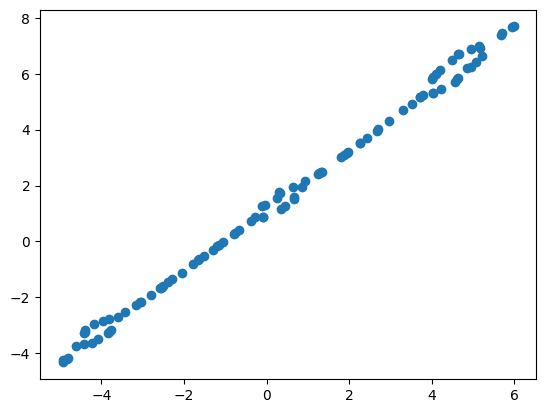

In [19]:
# Task 5 --- Use t-SNE to project doc vectors ---
# Use t-SNE to project training document embeddings into 2d and 
# plot them out for each of the above choices. 
# Each point should have a specific color (represent a particular cluster). 
# You may need to try different parameters of t-SNE. One can find more details about t-SNE in 
# this excellent article (https://distill.pub/2016/misread-tsne/ (Links to an external site.)).

# Your code
# 1. Use the average of embeddings of all words in each document.
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(doc_embedding.reshape(-1,1))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

D:\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


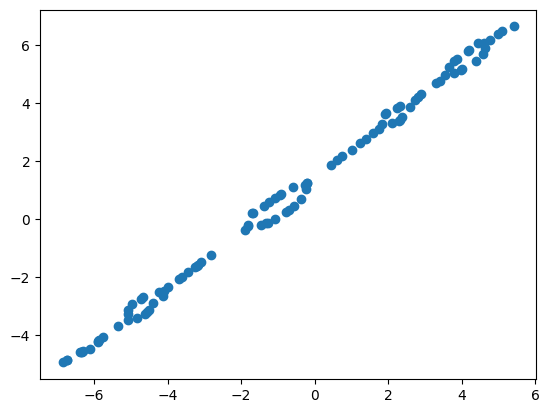

In [20]:
# 2. Use the first paragraph’s words and take an average on these embeddings.
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(doc_embedding_fp.reshape(-1,1))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

D:\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


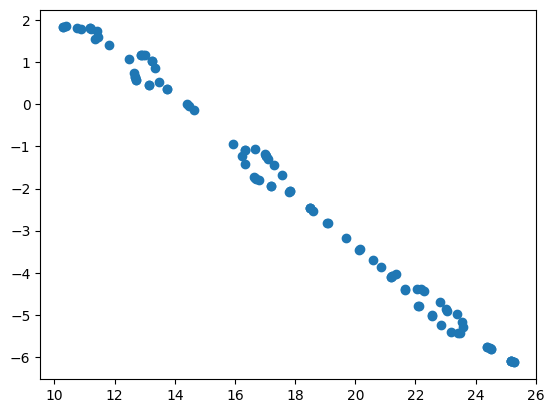

In [29]:
# 3. Use the doc2vec algorithm to present each document.
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(np.array(doc2vec_train).reshape(-1,1))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()